# Introduction to Data Science - Homework 3
*COMP 5369 / MATH 4100, University of Utah, http://datasciencecourse.net/*

Due: Friday, February 2, 11:59pm.

In this homework you will read in and analyze a movies dataset. First we'll do some basic analysis with vanilla Python, then we'll move on to doing more advanced analysis with [Pandas](http://pandas.pydata.org/pandas-docs/stable). 

## Your Data
Fill out the following information: 

*First Name:* Travis  
*Last Name:* Tiner  
*E-mail:* u0769566@utah.edu  
*UID:*  u0769566


## Part 1: Analyzing Data The Hard Way

In this part we'll do some manual analysis of a movies dataset.

### Task 1.1: Read in the data

Parse the file [movies.csv](movies.csv) using the [csv library](https://docs.python.org/3/library/csv.html). Lecture 6 and/or Homework 2 might be a good inspiration for this. 

We recommend that you store the header in a separate array. Make sure that at least the "ratings" and the "votes" columns are cast to the appropriate data types for doing calculations with them. 

Print the header, a row of the table, and the number of rows and columns.

In [1]:
# import the csv library
import csv
movies = []
with open('movies.csv') as csvfile:
    filereader = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in filereader:
        movies.append(row)
        
header = movies.pop(0)

for row in movies: 
    row[5] = float(row[5])
    row[6] = int(row[6])
print(header)
print(movies[0])
print("The number of columns is " + str(len(movies[0])))
print("The number of rows is " + str(len(movies)))

['', 'title', 'year', 'length', 'budget', 'rating', 'votes', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r10', 'mpaa', 'Action', 'Animation', 'Comedy', 'Drama', 'Documentary', 'Romance', 'Short']
['1', '$', '1971', '121', 'NA', 6.4, 348, '4.5', '4.5', '4.5', '4.5', '14.5', '24.5', '24.5', '14.5', '4.5', '4.5', '', '0', '0', '1', '1', '0', '0', '0']
The number of columns is 25
The number of rows is 58788


### Task 1.2:  Calculate movie stats

In this task, you will calculate some statistics about movies. We suggest you implement your solutions for Tasks 1.2.1-1.2.3 in one code cell - you should be able to calculate this in a single iteration over the dataset.

#### Task 1.2.1 Calcualte average ratings
Compute the average rating for the movies and print the output. Also print the number of movies.
Your output could look like this:
    
    Average rating: xxx.xxxx, Number of movies: xx

#### Task 1.2.2: Calculate average rating for major movies

Compute the average rating for the movies that have more than 500 votes in your loaded dataset and print the output. (We'll call these movies with more than 500 votes *major movies* from now on).

Your output could look like this:
    
    Average rating of movies with more than 500 votes: xxx.xxxx, Number of major movies: xx

#### Task 1.2.3: Find the highest rated major movie

Find out which of the movies with more than 500 votes has the highest rating.

Your output could look like this:
    
    Highest rating: xxx.xxxx, Title: MOVIE TITLE
 
#### Task 1.2.4: Interpret the data
 * What's the size relationship of major movies to all movies?
 * Are major movies usually better than the average movies?

In [2]:

sum = 0
count = 0
summajor = 0
countmajor = 0
highest = 0
for i in range(0,len(movies)):
    sum += movies[i][5]
    count += 1
    if movies[i][6] > 500:
        summajor += movies[i][5]
        countmajor += 1
    if movies[i][5] > highest:
        highest = movies[i][5]
        name_of_highest = movies[i][1]


print("Average rating: " + str(round(sum/count,3)) + ", Number of movies: " + str(count))
print("Average rating of movies with more than 500 votes: " + str(round(summajor/countmajor, 3)) + ", Number of movies with more than 500 votes: " + str(countmajor))
print("Highest rating: " + str(highest) + ", Title: " + name_of_highest)


Average rating: 5.933, Number of movies: 58788
Average rating of movies with more than 500 votes: 6.371, Number of movies with more than 500 votes: 6458
Highest rating: 10.0, Title: Dimensia Minds Trilogy: The Hope Factor


**Your Interpretation**: TODO

There is about 10 times more total movies than movies with more than 500 votes. The major movies had a higher average score by about .437 points 

## Part 2: Pandas

In this part we will use the [Pandas library](http://pandas.pydata.org/pandas-docs/stable) for our analysis.

### Task 2.1: Loading data

Read in the data again. This time you should create a [Pandas DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html). Print the head of the dataset. 
 * How many data rows did you load? How many columns?
 * Of which data types are the columns? 
 * Do you have to do manual data type conversions?

In [3]:
# import pansas and numpy
import pandas as pd

pdmovies = pd.read_csv("movies.csv")
pdmovies.head()

,Unnamed: 0,title,year,length,budget,rating,votes,r1,r2,r3,...,r9,r10,mpaa,Action,Animation,Comedy,Drama,Documentary,Romance,Short
0,1,$,1971,121,NaN,6.4,348,4.5,4.5,4.5,...,4.5,4.5,NaN,0,0,1,1,0,0,0
1,2,$1000 a Touchdown,1939,71,NaN,6.0,20,0.0,14.5,4.5,...,4.5,14.5,NaN,0,0,1,0,0,0,0
2,3,$21 a Day Once a Month,1941,7,NaN,8.2,5,0.0,0.0,0.0,...,24.5,24.5,NaN,0,1,0,0,0,0,1
3,4,"$40,000",1996,70,NaN,8.2,6,14.5,0.0,0.0,...,34.5,45.5,NaN,0,0,1,0,0,0,0
4,5,"$50,000 Climax Show, The",1975,71,NaN,3.4,17,24.5,4.5,0.0,...,0.0,24.5,NaN,0,0,0,0,0,0,0


In [4]:
pdmovies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58788 entries, 0 to 58787
Data columns (total 25 columns):
Unnamed: 0     58788 non-null int64
title          58788 non-null object
year           58788 non-null int64
length         58788 non-null int64
budget         5215 non-null float64
rating         58788 non-null float64
votes          58788 non-null int64
r1             58788 non-null float64
r2             58788 non-null float64
r3             58788 non-null float64
r4             58788 non-null float64
r5             58788 non-null float64
r6             58788 non-null float64
r7             58788 non-null float64
r8             58788 non-null float64
r9             58788 non-null float64
r10            58788 non-null float64
mpaa           4924 non-null object
Action         58788 non-null int64
Animation      58788 non-null int64
Comedy         58788 non-null int64
Drama          58788 non-null int64
Documentary    58788 non-null int64
Romance        58788 non-null int64
Sho

**Your Interpretation**: TODO

We loaded 58788 rows, and 25 columns. The data types appear above for all of the columns. It doesn't appear like we'll need to do any manual data type conversions.

### Task 2.2: Calculate the average rating

Compute the average rating for all movies and print the output in a formatted way.

Your output could look like this:
    
    Average rating: xxx.xxxx

In [5]:
print("Average rating: " + str(round(pdmovies["rating"].mean(),3)))

Average rating: 5.933


### Task 2.3: Compare the runtime

Measure the runtime of the mean calculation using [Pandas](http://pandas.pydata.org/pandas-docs/stable) and compare it to the computation time for calculating the mean using a for loop (you can copy the relevant parts from part one).

You can use [time.clock()](https://docs.python.org/3/library/time.html) to set timestamps before and after the execution of the code you want to measure, then you simply substract end time from start time.

Print your results in a human readable way and add a metric to the output. Calculate the factor of the difference and print it. Note that the exact times and the factors will vary when you re-run this and especially between machines. 

E.g.:  
    time using own code: xxx.xxx s  
    time using Pandas: xxx.xxx s  
    difference factor: xxx

In [6]:
import time
sum = 0
count = 0
stime_loop = time.clock()
for i in range(0,len(movies)):
    sum += movies[i][5]
    count += 1
loop_mean = sum/count
etime_loop = time.clock()
loop_time = etime_loop - stime_loop
print("time using own code: " + str(loop_time) + " s")

stime_pd = time.clock()
pdmovies["rating"].mean()
etime_pd = time.clock()
pd_time = etime_pd - stime_pd
print("time using Pandas: " + str(pd_time) + " s")

print("difference factor: " + str(loop_time/pd_time))

time using own code: 0.035505999999999815 s
time using Pandas: 0.0004810000000006198 s
difference factor: 73.81704781695231


### Task 2.4: Filter out rows

The whole movies dataset has about 60k entries. Use pandas to filter your dataframe to contain only the major movies with more than 500 votes.

Count and print the number of movies with more than 500 votes. 

E.g.:
    xxx.xxx movies have more than 500 votes.

In [7]:
major_movies = pdmovies[pdmovies["votes"]>500]
print(str(len(major_movies)) + " movies have more than 500 votes.")

6458 movies have more than 500 votes.


### Task 2.5: Calculate the average rating for major movies

Compute the average rating for the major movies.
Your output could look like this:
    
    Average rating of movies with more than 500 votes: xxx.xxxx

In [8]:
print("Average rating of movies with more than 500 votes: " + str(round(major_movies["rating"].mean(),3)))

Average rating of movies with more than 500 votes: 6.371


### Task 2.6: Find the highest rated major movie

Find the highest rated major movie in the dataframe. Hint: [idxmax()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.idxmax.html) could be a helpful function. 

Print the title and the rating.

Your output could look like this:
    
    Highest rated movie: TITLE, rating: x.x


In [9]:
highest_rating = pdmovies.iloc[major_movies["rating"].idxmax()][5]
highest_rated_title = pdmovies.iloc[major_movies["rating"].idxmax()][1]
print("Highest rated movie: " + highest_rated_title + ", rating: " + str(highest_rating))

Highest rated movie: Godfather, The, rating: 9.1


### Task 2.7: Filter out rows and count specific features

From the major movies you filtered out in a previous task, find out 
 * How many are comedies.
 * How many are dramas
 * How many are both, comedies and dramas
 
Create new dataframed for each of these subsets.

Hint: you can combine broadcasting statements with a boolean AND: `&`.

Print the results, e.g.:  

    xxx.xxx major movies are comedies.
    xxx.xxx major movies are dramas.
    xxx.xxx major movies are both, comedies and dramas.

In [10]:
comedy_movies = major_movies[major_movies["Comedy"]==1]
drama_movies = major_movies[major_movies["Drama"]==1]
comedy_and_drama = major_movies[(major_movies["Drama"]==1) & (major_movies["Comedy"]==1)]
print(str(len(comedy_movies)) + " major movies are comedies.")
print(str(len(drama_movies)) + " major movies are dramas.")
print(str(len(comedy_and_drama)) + " major movies are both comedies and dramas.")

2553 major movies are comedies.
3370 major movies are dramas.
814 major movies are both comedies and dramas.


### Task 2.8: Compare ratings of different categories

Now we want to compare the ratings for comedies and dramas for major movies.

Compute the average rating, maximum rating, minimum rating, standard deviation, and the median for each category. Hint: there is a function that does all of this in one line. 

What do these numbers tell us? Provide an interpretation.

In [11]:
print("Comedy rating statistics: \n" + str(comedy_movies.rating.describe(percentiles = [.5])))
print("\nDrama rating statistics: \n" + str(drama_movies.rating.describe(percentiles = [.5])))
print("\nDrama and Comedy rating statistics: \n" + str(comedy_and_drama.rating.describe(percentiles = [.5])))

Comedy rating statistics: 
count    2553.000000
mean        6.121387
std         1.196146
min         1.700000
50%         6.200000
max         8.700000
Name: rating, dtype: float64

Drama rating statistics: 
count    3370.000000
mean        6.749614
std         0.990969
min         1.300000
50%         6.900000
max         9.100000
Name: rating, dtype: float64

Drama and Comedy rating statistics: 
count    814.000000
mean       6.566216
std        0.968547
min        1.800000
50%        6.700000
max        8.600000
Name: rating, dtype: float64


**Your Interpretation**: TODO

We can see from this data that drama's are typically rated higher than comedies, and that when a drama introduces comedy to it, it's average rating goes down. All of these categories are skewed left, pulling the mean lower than the median. This is probably because we have some outliers with really low ratings. 

### Task 2.9: Movies per year

Calcluate how many major movies were made in each year.

Print the number like this, sorted by year:

    year   number of movies
    1902    xxx
    1903    xxx
    ...     ...

Use this data to render a line chart of the number of movies per year.

In [12]:
movies_per_year = major_movies["year"].value_counts()
movies_per_year = movies_per_year.to_frame()
movies_per_year = movies_per_year.reset_index(level=0)
movies_per_year.columns = ["year","number of movies"]
movies_per_year = movies_per_year.sort_values("year")
movies_per_year = movies_per_year.set_index("year")
movies_per_year.head()

,number of movies
year,
1902,1
1903,1
1915,1
1916,1
1917,1


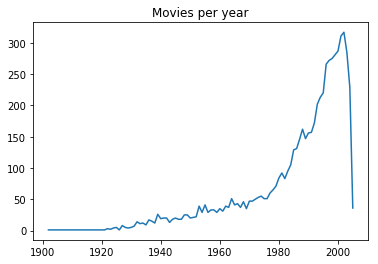

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.title("Movies per year")
plt.plot(movies_per_year)


### Task 2.10: Yearly average

Compute the average rating per year for all major movies.  
Use the numbers you computed to plot a line chart. Plot the year on the x-axis and the average rating on th y axis.  

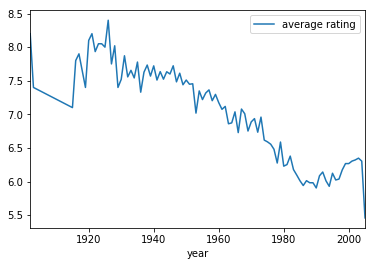

In [14]:
avg_rating_per_year = major_movies.groupby("year").rating.mean()
avg_rating_per_year = avg_rating_per_year.to_frame()
avg_rating_per_year = avg_rating_per_year.reset_index(level=0)
avg_rating_per_year.columns = ["year","average rating"]
avg_rating_per_year.plot(x="year",y="average rating")

### Task 2.11: Explore and Interpret

Are old movies better? How could you explain this? Are there differences between the rating of major movies and all movies over time? Continue to explore and use plots to inform your answer. Interesting measures to consider are the total number of votes per year, the average number of votes for a movie in a particular year, etc. 

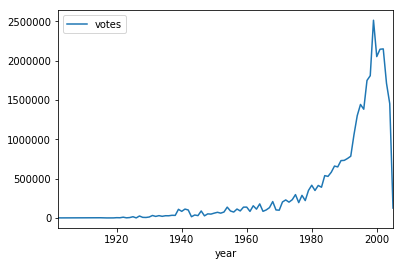

In [15]:
votes_per_year = major_movies[["year","votes"]]
votes_per_year = votes_per_year.groupby("year").sum()
votes_per_year.plot()

This shows that there has been a large spike in the total number of votes per year, starting around 1990. But this may have just been because of an increase in movies being made. To account for this, we should see the average number of votes a movie receives, broken down by year.

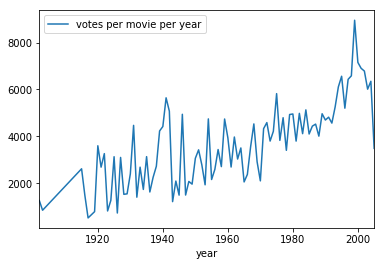

In [16]:
result = pd.concat([movies_per_year,votes_per_year], axis=1)
result['votes per movie per year'] = result["votes"]/result["number of movies"]
result.plot(y="votes per movie per year")

So this isn't nearly as dramatic, but you can still see that movies on average are receiving more ratings as time goes on, with a specifically high peak around the year 2000. This may be a reason why movies are getting lower scores. 

**TODO: your code and your interpretation**